In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\AAA HEATSTROKE\Processed data\no_scaling_and_binning_tree_based_model.csv")

In [3]:
pd.pandas.set_option('display.max_columns',None)
df

,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,hrv_cvsd,hrv_sdnn,hrv_cvnni,hrv_mean_hr,hrv_min_hr,hrv_max_hr,hrv_std_hr,hrv_total_power,hrv_vlf,hrv_lf,hrv_hf,hrv_lf_hf_ratio,hrv_lfnu,hrv_hfnu,hrv_SD1,hrv_SD2,hrv_SD2SD1,hrv_CSI,hrv_CVI,hrv_CSI_Modified,hrv_mean,hrv_std,hrv_min,hrv_max,hrv_ptp,hrv_sum,hrv_energy,hrv_skewness,hrv_kurtosis,hrv_peaks,hrv_rms,hrv_lineintegral,hrv_n_above_mean,hrv_n_below_mean,hrv_n_sign_changes,hrv_iqr,hrv_iqr_5_95,hrv_pct_5,hrv_pct_95,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,Temperature,Humidity,PMV,PDD,Personal Thermal Assessment,Age,X_axis,Y_axis,Z_axis,Experiment 1,Experiment 2,Experiment 3,Experiment 4,Experiment 5,Experiment 6,Experiment 7,Experiment 8,Radio,Reading,Typing,Green,Orange,Red,hot,neutral,slightly warm,warm,F,M
0,101,831.683168,765.625,1187.5,333.768287,333.768434,78.0,77.227723,91.0,90.099010,0.401317,253.538254,0.304850,77.998815,37.281553,142.222222,20.875105,28327.595170,2371.135187,9785.693839,16170.766140,0.605147,37.700418,62.299582,237.198793,268.886640,1.133592,1.133592,6.008802,1219.230916,831.683168,252.279992,421.875,1609.375,1187.5,84000.000,7.628955e+07,1.262270,1.378903,29.0,869.104186,23343.750,39.0,62.0,0,250.00000,921.8750,531.25000,1453.12500,4.572689,0.999700,0.654199,27,60,0.66,14.3,neutral,20,-40.96875,-21.75000,44.56250,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
1,102,834.558824,765.625,1187.5,333.552878,333.564502,79.0,77.450980,92.0,90.196078,0.399690,253.946200,0.304288,77.756997,37.281553,142.222222,20.914202,28367.494440,2338.746707,9425.326334,16603.421400,0.567674,36.211217,63.788783,237.033856,269.800475,1.138236,1.138236,6.009973,1228.386483,834.558824,252.698300,421.875,1609.375,1187.5,85125.000,7.755518e+07,1.224890,1.268597,29.0,871.977557,23656.250,40.0,62.0,0,261.71875,917.1875,532.03125,1449.21875,4.582562,0.999926,0.657089,27,60,0.66,14.3,neutral,20,-43.34375,-22.78125,41.34375,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
2,102,834.558824,765.625,1187.5,333.552878,333.564502,79.0,77.450980,92.0,90.196078,0.399690,253.946200,0.304288,77.756997,37.281553,142.222222,20.914202,28367.494440,2338.746707,9425.326334,16603.421400,0.567674,36.211217,63.788783,237.033856,269.800475,1.138236,1.138236,6.009973,1228.386483,834.558824,252.698300,421.875,1609.375,1187.5,85125.000,7.755518e+07,1.224890,1.268597,29.0,871.977557,23656.250,40.0,62.0,0,261.71875,917.1875,532.03125,1449.21875,4.582562,0.999926,0.657089,27,60,0.66,14.3,neutral,20,-44.84375,-24.31250,39.62500,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,101,834.467822,765.625,1187.5,334.756609,334.787275,78.0,77.227723,91.0,90.099010,0.401199,255.211101,0.305837,77.822798,37.281553,142.222222,21.006974,28566.019940,2376.921417,9696.115649,16492.982870,0.587893,37.023480,62.976520,237.901163,271.419323,1.140891,1.140891,6.014157,1238.639578,834.467822,253.944537,421.875,1609.375,1187.5,84281.250,7.684326e+07,1.219969,1.228606,29.0,872.252471,23484.375,39.0,62.0,0,265.62500,921.8750,531.25000,1453.12500,4.572286,0.999700,0.656106,27,60,0.66,14.3,neutral,20,-44.03125,-23.68750,40.68750,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
4,101,834.467822,765.625,1187.5,334.756609,334.787275,78.0,77.227723,91.0,90.099010,0.401199,255.211101,0.305837,77.822798,37.281553,142.222222,21.006974,28566.019940,2376.921417,9696.115649,16492.982870,0.587893,37.023480,62.976520,237.901163,271.419323,1.140891,1.140891,6.014157,1238.639578,834.467822,253.944537,421.875,1609.375,1187.5,84281.250,7.684326e+07,1.219969,1.228606,29.0,872.252471,23484.375,39.0,62.0,0,265.62500,921.8750,531.25000,1453.12500,4.572286,0.999700,0.656106,27,60,0.66,14.3,neutral,20,-43.96875,-22.96875,41.09375,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
x=df.drop(['Personal Thermal Assessment'],axis=1)   #Features(Removing ID as it is unique for all rows)
y=df['Personal Thermal Assessment']

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)

LabelEncoder()

In [6]:
le.classes_

array(['hot', 'neutral', 'slightly warm', 'very hot', 'warm'],
      dtype=object)

In [7]:
y=le.transform(y)

In [24]:
val=pd.DataFrame(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [30]:
X_train.shape

(56849, 80)

In [17]:
X_test.shape

(24365, 80)

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.ensemble import RandomForestClassifier

In [40]:
classifier2=RandomForestClassifier(n_estimators=6,criterion='entropy')
classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6)

ACCURACY OF THE MODEL:  0.9975374512620562
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1333
           1       1.00      1.00      1.00     14286
           2       1.00      1.00      1.00      5330
           3       1.00      0.99      1.00       706
           4       1.00      0.99      1.00      2710

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


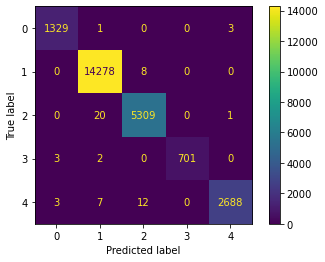

In [41]:
y_pred = classifier2.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier2, X_test, y_test)

In [10]:
classifier=xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

ACCURACY OF THE MODEL:  0.9983993433203365
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1333
           1       1.00      1.00      1.00     14286
           2       1.00      1.00      1.00      5330
           3       1.00      1.00      1.00       706
           4       1.00      1.00      1.00      2710

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


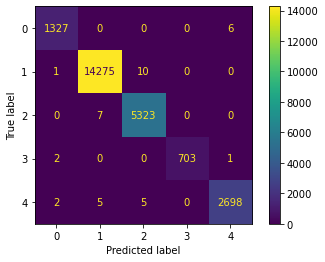

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


y_pred = classifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test)